# Importing dataset and libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

## Getting the data and pre-processing it 

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualizing dataset

In [16]:
def plot_input_img(i):

    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show

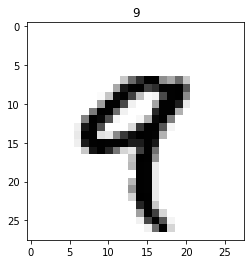

In [17]:
for i in range(5):
    plot_input_img(i)

## Preprocessing the image